In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement:

Does the category that the project and challenge are launched in affect engagement? In effect: do certain categories garner more attention and engagement than others?

## Import datasets + check values
import the datasets and check shape, null values and data types

In [2]:
#import published content csv
content_path = './assets/datasets/content_published_scrubbed.csv'
pub_content = pd.read_csv(content_path)

In [3]:
pub_content.shape

(30325, 5)

In [4]:
pub_content.dtypes

action                      object
content_type_name           object
parent_content_type_name    object
project_id                   int64
user_id                      int64
dtype: object

In [5]:
#import watch csv
watch_path = './assets/datasets/watch_scrubbed.csv'
watches = pd.read_csv(watch_path)

In [6]:
watches.shape

(6004, 5)

In [7]:
watches.isnull().sum()

watch                        0
content_type_name            0
parent_content_type_name     0
project_id                  12
user_id                      0
dtype: int64

In [8]:
watches.dropna(axis=0, inplace=True)
watches.shape

(5992, 5)

In [9]:
watches.dtypes

watch                        object
content_type_name            object
parent_content_type_name     object
project_id                  float64
user_id                       int64
dtype: object

In [10]:
watches['project_id'] = watches.project_id.astype('int64')
watches.dtypes

watch                       object
content_type_name           object
parent_content_type_name    object
project_id                   int64
user_id                      int64
dtype: object

In [11]:
#import entry vote csv
vote_path = './assets/datasets/entry_vote_scrubbed.csv'
entry_votes = pd.read_csv(vote_path)

In [12]:
entry_votes.shape

(37893, 5)

In [13]:
entry_votes.isnull().sum()

vote                        0
content_type_name           0
project_id                  0
parent_content_type_name    0
user_id                     0
dtype: int64

In [14]:
entry_votes.dtypes

vote                        object
content_type_name           object
project_id                   int64
parent_content_type_name    object
user_id                      int64
dtype: object

In [15]:
#import project csv
project_path = './assets/datasets/projects_scrubbed.csv'
projects = pd.read_csv(project_path)

In [16]:
projects.shape

(41, 10)

In [17]:
projects.isnull().sum()

content_type_name           0
parent_content_type_name    0
post_count                  0
topic_count                 0
view_count                  0
watch_count                 0
participants                0
title                       0
project_id                  0
categories                  0
dtype: int64

In [18]:
projects.dtypes

content_type_name           object
parent_content_type_name    object
post_count                   int64
topic_count                  int64
view_count                   int64
watch_count                  int64
participants                 int64
title                       object
project_id                   int64
categories                  object
dtype: object

In [19]:
#import users csv
users_path = './assets/datasets/users_scrubbed.csv'
users = pd.read_csv(users_path)

In [20]:
users.shape

(194152, 2)

In [21]:
users.isnull().sum()

username    0
user_id     0
dtype: int64

In [22]:
users.dtypes

username    object
user_id      int64
dtype: object

## Test merge on a sample
Prior to merging the datasets I wanted to do a test merge on a sample of two to make sure that everything is looking and coming together like I wanted

In [23]:
proj_sample = projects.sample(n=10, axis=0)
proj_sample

,content_type_name,parent_content_type_name,post_count,topic_count,view_count,watch_count,participants,title,project_id,categories
18,project,project,51,1,925,2054,2091,LA 2060: World Athletic Games,290,Adaptive Sports
13,project,project,206,4,2978,932,951,High Temperature Clamping,272,Infrastructure and Energy
39,project,project,2144,2,2798,4138,4247,Unmanned Cargo System,311,Ground Mobility
16,project,project,235,7,2559,2305,2355,IoT Wallet,280,Consumer Products
9,project,project,753,5,2474,2562,2632,Explore with Us: The Future of Mobility,322,Air Mobility
11,project,project,134,21,2462,9743,9836,Farming Mars,276,Mars
24,project,project,871,3,2049,2780,2853,Mass Mobility,310,Adaptive Sports
29,project,project,198,5,4417,240,253,Position Sensor for Inspection Probes,267,Industrial Inspection and Monitoring
35,project,project,82,18,3964,12602,12746,Technicolor VR Experience,278,Mars
12,project,project,206,4,2978,932,951,High Temperature Clamping,272,Industrial Inspection and Monitoring


In [24]:
watch_sample = watches.sample(n=10, axis=0)
watch_sample

,watch,content_type_name,parent_content_type_name,project_id,user_id
4756,yes,project,project,309,131797
3561,yes,project,project,311,169321
1634,yes,project,project,284,126233
3426,yes,project,project,276,116485
1698,yes,project,project,271,127172
970,yes,project,project,279,112173
3134,yes,project,project,280,162995
1985,yes,project,project,268,131891
4609,yes,project,project,304,186306
5665,yes,project,project,275,130743


In [25]:
watch_sample['project_id'] = watch_sample.project_id.astype('int64', inplace=True)

In [26]:
merged = proj_sample.merge(watch_sample, how='outer', on='project_id')

In [27]:
merged.head()

,content_type_name_x,parent_content_type_name_x,post_count,topic_count,view_count,watch_count,participants,title,project_id,categories,watch,content_type_name_y,parent_content_type_name_y,user_id
0,project,project,51.0,1.0,925.0,2054.0,2091.0,LA 2060: World Athletic Games,290,Adaptive Sports,NaN,NaN,NaN,NaN
1,project,project,206.0,4.0,2978.0,932.0,951.0,High Temperature Clamping,272,Infrastructure and Energy,NaN,NaN,NaN,NaN
2,project,project,206.0,4.0,2978.0,932.0,951.0,High Temperature Clamping,272,Industrial Inspection and Monitoring,NaN,NaN,NaN,NaN
3,project,project,2144.0,2.0,2798.0,4138.0,4247.0,Unmanned Cargo System,311,Ground Mobility,yes,project,project,169321.0
4,project,project,235.0,7.0,2559.0,2305.0,2355.0,IoT Wallet,280,Consumer Products,yes,project,project,162995.0


Many of the NaNs, particularly the ones in the user_id column will go away once the entire user set is in. the 'action' column on the other hand will need some clean up

## Merge datasets together
Having tried to merge all 5 datasets together and running into problems with how large the dataset becomes I decided to only concat projects, watches and pub_content together and then take a sample of the dataframe since it will have over a million rows. 

In [28]:
project_content = projects.merge(pub_content, how='inner', on='project_id')

In [29]:
project_content.isnull().sum()

content_type_name_x           0
parent_content_type_name_x    0
post_count                    0
topic_count                   0
view_count                    0
watch_count                   0
participants                  0
title                         0
project_id                    0
categories                    0
action                        0
content_type_name_y           0
parent_content_type_name_y    0
user_id                       0
dtype: int64

In [30]:
project_content.shape

(34438, 14)

In [31]:
content = project_content.merge(watches, how='inner', on='project_id')

In [32]:
content.shape

(16715686, 18)

In [59]:
content.isnull().sum()

content_type_name_x           0
parent_content_type_name_x    0
post_count                    0
topic_count                   0
view_count                    0
watch_count                   0
participants                  0
title                         0
project_id                    0
categories                    0
action                        0
content_type_name_y           0
parent_content_type_name_y    0
user_id_x                     0
watch                         0
content_type_name             0
parent_content_type_name      0
user_id_y                     0
dtype: int64

## Take a sample

In [34]:
content_sample = content.sample(frac=0.01)

In [35]:
content_sample.shape

(167157, 18)

In [36]:
content_sample.head()

,content_type_name_x,parent_content_type_name_x,post_count,topic_count,view_count,watch_count,participants,title,project_id,categories,action,content_type_name_y,parent_content_type_name_y,user_id_x,watch,content_type_name,parent_content_type_name,user_id_y
8014263,project,project,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,134692,yes,project,project,132628
5776948,project,project,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,146767,yes,project,project,191938
11219225,project,project,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,191650,yes,project,project,154686
3617170,project,project,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,entry,challenge,136466,yes,project,project,175315
14095165,project,project,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,topic,64204,yes,project,project,178925


## Column clean up
Review the columns, drop the uneeded duplicates and rename columns as neeeded

In [37]:
content_sample.loc[:,'content_type_name_x'].nunique()

1

In [38]:
content_sample.loc[:,'parent_content_type_name_x'].nunique()

1

In [39]:
content_sample.loc[:,'categories'].nunique()

10

In [40]:
content_sample.loc[:,'parent_content_type_name_y'].nunique()

5

In [41]:
content_sample.loc[:,'parent_content_type_name_y'].unique()

array(['entry', 'challenge', 'topic', 'idea', 'brainstorm'], dtype=object)

In [42]:
content_sample.loc[:,'parent_content_type_name'].nunique()

1

In [43]:
content_sample.loc[:,'content_type_name'].nunique()

1

In [44]:
content_sample.loc[:,'user_id_x'].nunique()

2916

In [45]:
content_sample.loc[:,'user_id_y'].nunique()

3478

In [46]:
content_sample.drop(['content_type_name_x', 'parent_content_type_name_x', 'parent_content_type_name', 'content_type_name', 'user_id_x'], axis=1, inplace=True)

In [47]:
content_sample.head()

,post_count,topic_count,view_count,watch_count,participants,title,project_id,categories,action,content_type_name_y,parent_content_type_name_y,watch,user_id_y
8014263,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,132628
5776948,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,191938
11219225,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,154686
3617170,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,entry,challenge,yes,175315
14095165,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,topic,yes,178925


In [48]:
content_sample.rename(columns={'content_type_name_y':'content_type_name', 'parent_content_type_name_y':'parent_content_type_name', 'user_id_y':'user_id'}, inplace=True)

In [49]:
content_sample.head()

,post_count,topic_count,view_count,watch_count,participants,title,project_id,categories,action,content_type_name,parent_content_type_name,watch,user_id
8014263,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,132628
5776948,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,191938
11219225,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,154686
3617170,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,entry,challenge,yes,175315
14095165,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,topic,yes,178925


In [50]:
content_sample.rename(columns = {'post_count':'total_post_count', 'topic_count':'total_topic_count', 'view_count':'total_view_count','watch_count':'total_watch_count', 'participants':'total_participants'}, inplace=True)

In [51]:
content_sample.head()

,total_post_count,total_topic_count,total_view_count,total_watch_count,total_participants,title,project_id,categories,action,content_type_name,parent_content_type_name,watch,user_id
8014263,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,132628
5776948,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,191938
11219225,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,154686
3617170,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,entry,challenge,yes,175315
14095165,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,topic,yes,178925


In [52]:
project_content = content_sample

In [53]:
project_content.head()

,total_post_count,total_topic_count,total_view_count,total_watch_count,total_participants,title,project_id,categories,action,content_type_name,parent_content_type_name,watch,user_id
8014263,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,132628
5776948,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,191938
11219225,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,entry,yes,154686
3617170,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,entry,challenge,yes,175315
14095165,7285,53,16973,17116,17379,The Urbanization of Mars,279,Mars,content_published,post,topic,yes,178925


## Exploratory Data Analysis

#### Data shape

In [54]:
project_content.shape

(167157, 13)

#### Data types
All data types look correct

In [55]:
project_content.dtypes

total_post_count             int64
total_topic_count            int64
total_view_count             int64
total_watch_count            int64
total_participants           int64
title                       object
project_id                   int64
categories                  object
action                      object
content_type_name           object
parent_content_type_name    object
watch                       object
user_id                      int64
dtype: object

#### Count of null values
All null values were gotten rid of prior to pulling into the notebook and merging the datasets, however you can see above some of the other clean up that happened.

In [56]:
project_content.isnull().sum()

total_post_count            0
total_topic_count           0
total_view_count            0
total_watch_count           0
total_participants          0
title                       0
project_id                  0
categories                  0
action                      0
content_type_name           0
parent_content_type_name    0
watch                       0
user_id                     0
dtype: int64

#### Basic Summary Statistics
Because of the kind of data this is, ie project totals and ids these numbers really don't mean anything

In [57]:
project_content.describe()

,total_post_count,total_topic_count,total_view_count,total_watch_count,total_participants,project_id,user_id
count,167157.000000,167157.000000,167157.000000,167157.000000,167157.000000,167157.000000,167157.000000
mean,5815.850781,40.522036,21896.012437,13510.931543,13727.351855,282.705139,145446.027052
std,2529.062866,21.157125,28143.537381,6114.008899,6192.906400,13.923000,38692.083945
min,6.000000,1.000000,559.000000,51.000000,53.000000,138.000000,1.000000
25%,2665.000000,19.000000,16973.000000,4485.000000,4599.000000,279.000000,116136.000000
50%,7285.000000,53.000000,16973.000000,17116.000000,17379.000000,279.000000,149101.000000
75%,7285.000000,53.000000,16973.000000,17116.000000,17379.000000,279.000000,173626.000000
max,10980.000000,53.000000,125156.000000,17116.000000,17379.000000,322.000000,211638.000000


#### Number of unique values for each column

In [58]:
project_content.nunique()

total_post_count              30
total_topic_count             17
total_view_count              30
total_watch_count             29
total_participants            30
title                         30
project_id                    30
categories                    10
action                         1
content_type_name              3
parent_content_type_name       5
watch                          1
user_id                     3478
dtype: int64

#### Plot the distribution of each column
Looking at the distribution of each column by category 

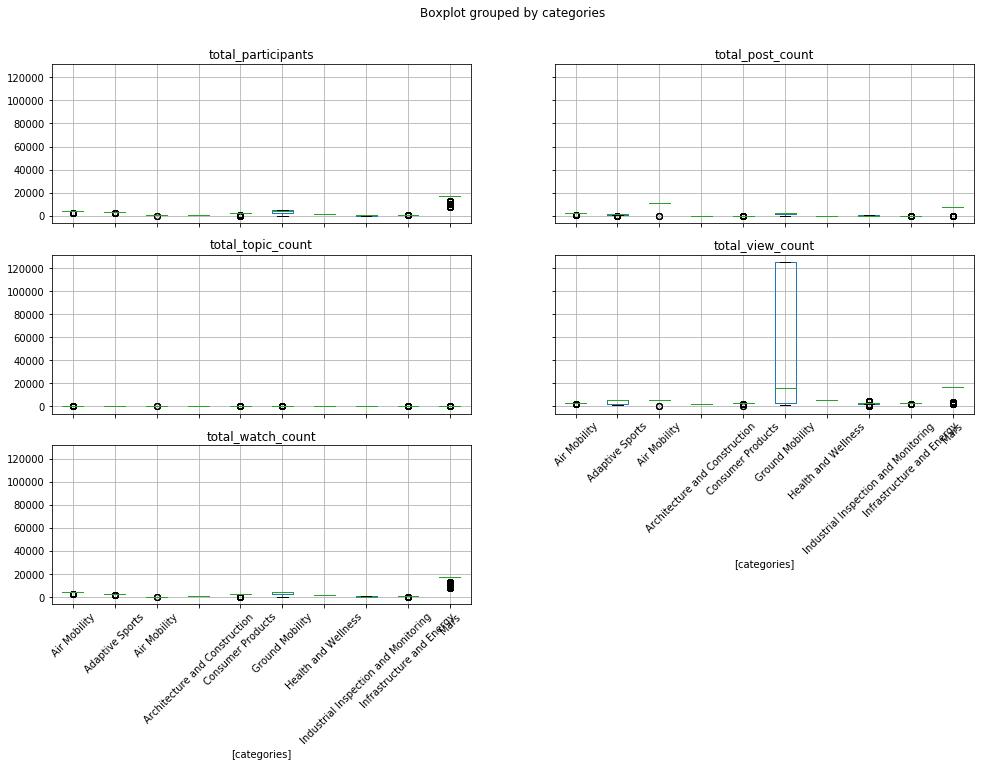

In [113]:
axes = project_content.drop(['user_id', 'project_id'], axis=1).boxplot(by='categories', figsize=(16,10), rot=45)


#### Compare metrics against each other
Compare total counts of different engagement metrics together to see if there are any correlations that pop out.

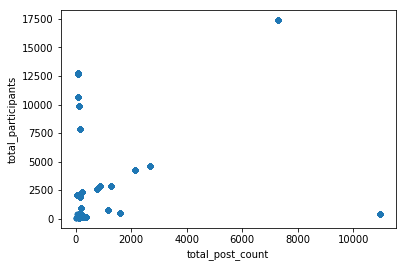

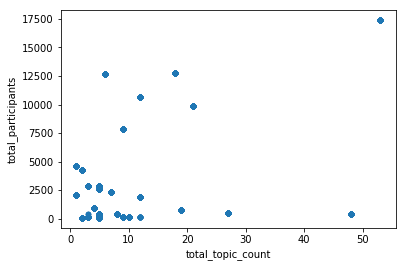

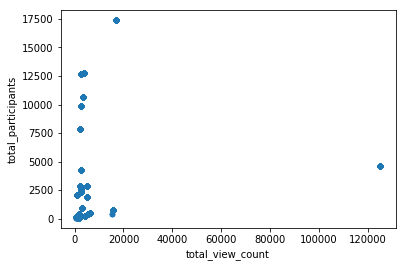

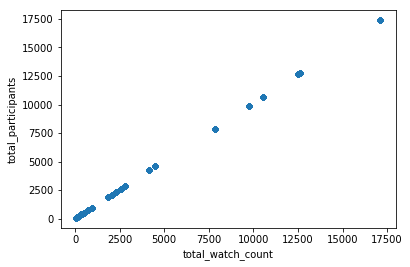

In [116]:
columns = ['total_post_count', 'total_topic_count', 'total_view_count', 'total_watch_count']

for x in columns:
    ax = project_content.plot(kind='scatter', x=x, y='total_participants')

#### Shortcomings
This will likely need to be classification model and currently because of the kind of data there are not a lot of strictly numerical columns. These will hvae to be created through value counts

#### Assumptions
The value contents of the published_content such as entries, posts, ideas, etc. will be the most valuable when starting the modeling.

#### Next Steps
 - Decide which transformations (means, value_counts, etc) of columns should happen to help better build out a predictive model. 
 - Decide which type of model will suit my data best.